Shape of Dataset: (569, 30)
Classes: ['malignant' 'benign']
Confusion Matrix: [[176  36]
 [ 18 339]]
Accuracy: 0.9050966608084359


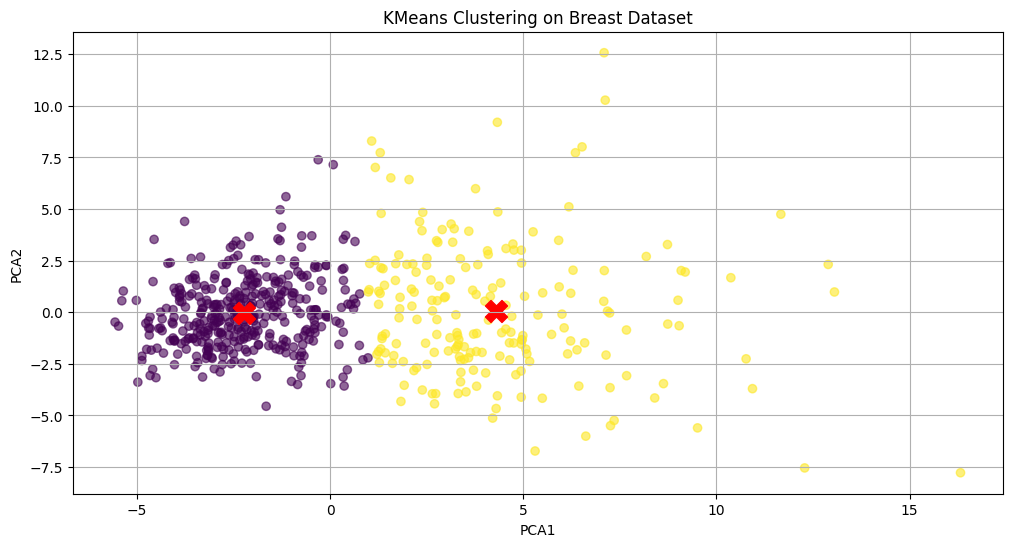

In [1]:
#Develop a program to implement k-means clustering using Wisconsin Breast Cancer data set and visualize the clustering result. 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix,accuracy_score

data=load_breast_cancer()
X=data.data
y=data.target
feature_names=data.feature_names
target_names=data.target_names

print("Shape of Dataset:", X.shape)
print("Classes:", target_names)

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

kmeans=KMeans(n_clusters=2,random_state=42,n_init=10)
clusters=kmeans.fit_predict(X_scaled)
labels_mapped=np.where(clusters==1,0,1)

print("Confusion Matrix:", confusion_matrix(y,labels_mapped))
print("Accuracy:", accuracy_score(y,labels_mapped))

pca=PCA(n_components=2)
X_pca=pca.fit_transform(X_scaled)
centers_pca=pca.transform(kmeans.cluster_centers_)

plt.figure(figsize=(12,6))
plt.scatter(X_pca[:,0],X_pca[:,1],c=clusters,cmap='viridis',alpha=0.6)
plt.scatter(centers_pca[:,0],centers_pca[:,1],s=250,marker='X',c='red',label='Centroid')
plt.title("KMeans Clustering on Breast Dataset")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.grid(True)
plt.show()